# **Task 1: Preprocess the Data**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


file_path = '/content/wine-clustering.csv'
data = pd.read_csv(file_path)

print("First few rows of the dataset:")
print(data.head())

print("\nInformation about the dataset:")
print(data.info())

print("\nSummary statistics of the dataset:")
print(data.describe())

print("\nChecking for null values in the dataset:")
null_values = data.isnull().sum()
print(null_values)

if null_values.any():
    data = data.fillna(data.mean())

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Converting scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)

print("\nFirst few rows of the scaled data:")
print(scaled_df.head())


First few rows of the dataset:
   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2

# **Task 2: Model that divides data into multiple Group**

In [ ]:
from sklearn.cluster import KMeans
#Applying KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_df)

print(data.head())

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Cluster  
0   3.92     1065        3  
1   3.40     1050        3  
2   3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# **Task 3: Determine the Optimal Number of Groups**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

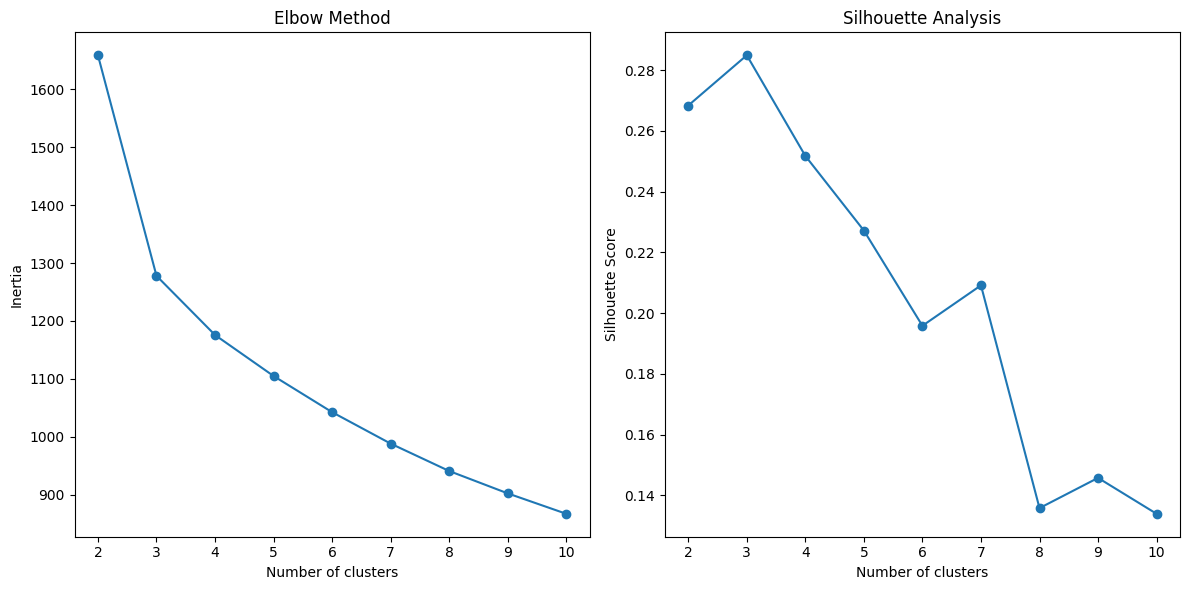

The optimal number of clusters is: 3


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Applying Elbow method and Silhouette analysis to find optimal number of cluster
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')


plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f'The optimal number of clusters is: {optimal_k}')


In [ ]:
# Applyig K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Calculate the correlation matrix and finding columns with highest correlation
correlation_matrix = data.corr()
corr_pairs = correlation_matrix.abs().unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort", ascending=False)
highest_corr = sorted_pairs[(sorted_pairs < 1.0)].idxmax()

highest_corr, sorted_pairs[highest_corr]


(('Total_Phenols', 'Flavanoids'), 0.8645635000951147)

Task 4: Plot Graph With

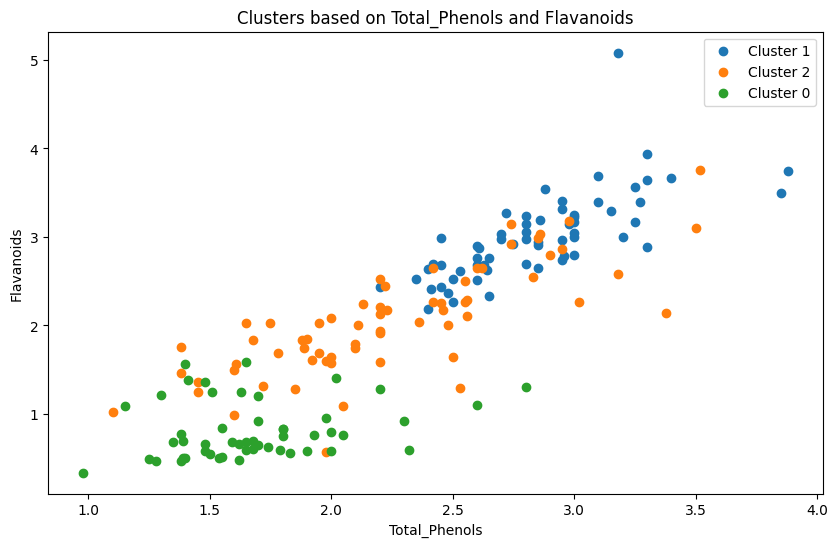

In [ ]:
import matplotlib.pyplot as plt

col1, col2 = highest_corr

plt.figure(figsize=(10, 6))
for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data[col1], cluster_data[col2], label=f'Cluster {cluster}')

plt.xlabel(col1)
plt.ylabel(col2)
plt.title(f'Clusters based on {col1} and {col2}')
plt.legend()
plt.show()
